In [4]:
import xarray as xr
import pandas as pd

In [21]:
file_path = f'/lustre/storeB/project/fou/hi/foccus/experiments/min-max-all-2017-24/mlflow/187656373550779284/90ed5f0579a94e1cacec799fe5fcc6f1/metrics/train_mse_loss_epoch'
mse_epoch = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["idk", "idk2", "idk3"])

/tmp/ipykernel_2576019/1320785067.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mse_epoch = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["idk", "idk2", "idk3"])


In [ ]:
mse_epoch.head()
#Er det ID kjøring, MSE verdi og Step? 

,idk,idk2,idk3
0,1752216689684,0.016650,291
1,1752219046897,0.002661,583
2,1752221316396,0.000978,875
3,1752223395810,0.000602,1167
4,1752225228106,0.000497,1459


In [23]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'MSE LOSS EPOCH')

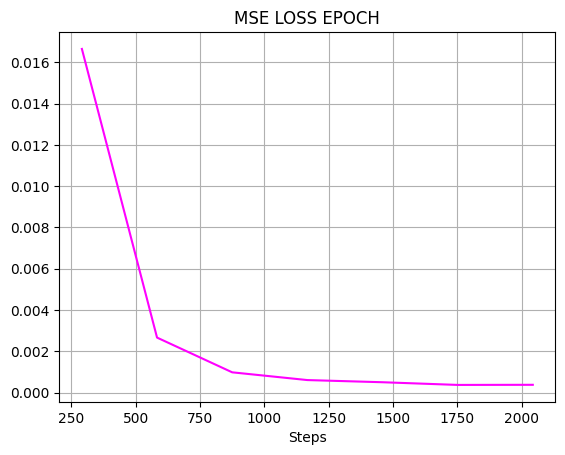

In [29]:
plt.plot(mse_epoch["idk3"],mse_epoch["idk2"], color = "magenta")
plt.grid(True)
plt.xlabel(f'Steps')
plt.title("MSE LOSS EPOCH")